In [270]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
import re
import warnings
warnings.filterwarnings("ignore")

In [271]:
df=pd.read_csv("Sheet_1.csv",encoding='ISO-8859-1')
df

,response_id,class,response_text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN,NaN,NaN
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN,NaN,NaN,NaN,NaN
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN,NaN,NaN,NaN,NaN
3,response_4,not_flagged,i cant think of one really...i think i may hav...,NaN,NaN,NaN,NaN,NaN
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
85,response_86,flagged,I feel like a burden to everyone around me.,NaN,NaN,NaN,NaN,NaN
86,response_87,flagged,Ive had thoughts of hurting myself,NaN,NaN,NaN,NaN,NaN
87,response_88,flagged,Struggling with constant anxiety and fear.,NaN,NaN,NaN,NaN,NaN
88,response_89,flagged,"Life feels heavy, and Im not coping well.",NaN,NaN,NaN,NaN,NaN


In [272]:
df.columns

Index(['response_id', 'class', 'response_text', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [273]:
df.drop([ 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',"response_id"],axis=1,inplace=True)


In [274]:
df

,class,response_text
0,not_flagged,I try and avoid this sort of conflict
1,flagged,Had a friend open up to me about his mental ad...
2,flagged,I saved a girl from suicide once. She was goin...
3,not_flagged,i cant think of one really...i think i may hav...
4,not_flagged,Only really one friend who doesn't fit into th...
...,...,...
85,flagged,I feel like a burden to everyone around me.
86,flagged,Ive had thoughts of hurting myself
87,flagged,Struggling with constant anxiety and fear.
88,flagged,"Life feels heavy, and Im not coping well."


In [275]:
df.isna().sum()

class            0
response_text    0
dtype: int64

In [276]:
df

,class,response_text
0,not_flagged,I try and avoid this sort of conflict
1,flagged,Had a friend open up to me about his mental ad...
2,flagged,I saved a girl from suicide once. She was goin...
3,not_flagged,i cant think of one really...i think i may hav...
4,not_flagged,Only really one friend who doesn't fit into th...
...,...,...
85,flagged,I feel like a burden to everyone around me.
86,flagged,Ive had thoughts of hurting myself
87,flagged,Struggling with constant anxiety and fear.
88,flagged,"Life feels heavy, and Im not coping well."


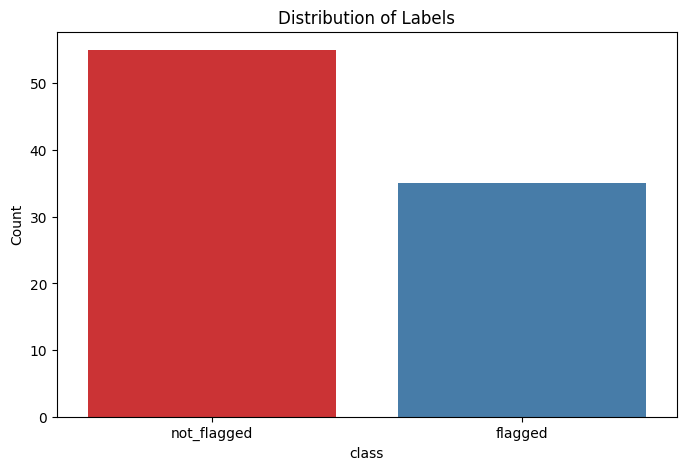

In [277]:
#plot the distribution of theclass labels
plt.figure(figsize=(8,5))
sns.countplot(x='class',data=df,palette='Set1')
plt.title('Distribution of Labels')
plt.xlabel('class')
plt.ylabel('Count')
plt.show()

In [278]:
df['class']=df['class'].map({'not_flagged':0,'flagged':1})
df

,class,response_text
0,0,I try and avoid this sort of conflict
1,1,Had a friend open up to me about his mental ad...
2,1,I saved a girl from suicide once. She was goin...
3,0,i cant think of one really...i think i may hav...
4,0,Only really one friend who doesn't fit into th...
...,...,...
85,1,I feel like a burden to everyone around me.
86,1,Ive had thoughts of hurting myself
87,1,Struggling with constant anxiety and fear.
88,1,"Life feels heavy, and Im not coping well."


In [279]:
response=df.response_text
response


0                 I try and avoid this sort of conflict
1     Had a friend open up to me about his mental ad...
2     I saved a girl from suicide once. She was goin...
3     i cant think of one really...i think i may hav...
4     Only really one friend who doesn't fit into th...
                            ...                        
85          I feel like a burden to everyone around me.
86                  Ive had thoughts of hurting myself
87           Struggling with constant anxiety and fear.
88           Life feels heavy, and Im not coping well.
89                     I dont want to be here anymore.
Name: response_text, Length: 90, dtype: object

In [280]:
df.dtypes

class             int64
response_text    object
dtype: object

In [281]:
from nltk.tokenize import TweetTokenizer
tk = TweetTokenizer()
# Use the pandas Series directly for apply
response=response.apply(lambda x: ' '.join(tk.tokenize(x)))
response

0                 I try and avoid this sort of conflict
1     Had a friend open up to me about his mental ad...
2     I saved a girl from suicide once . She was goi...
3     i cant think of one really ... i think i may h...
4     Only really one friend who doesn't fit into th...
                            ...                        
85         I feel like a burden to everyone around me .
86                I  ve had thoughts of hurting myself
87          Struggling with constant anxiety and fear .
88       Life feels heavy , and I  m not coping well .
89                  I don  t want to be here anymore .
Name: response_text, Length: 90, dtype: object

In [282]:
response=response.str.replace('[^a-zA-Z0-9]', ' ',regex=True)
response

0                 I try and avoid this sort of conflict
1     Had a friend open up to me about his mental ad...
2     I saved a girl from suicide once   She was goi...
3     i cant think of one really     i think i may h...
4     Only really one friend who doesn t fit into th...
                            ...                        
85         I feel like a burden to everyone around me  
86                I   ve had thoughts of hurting myself
87          Struggling with constant anxiety and fear  
88       Life feels heavy   and I   m not coping well  
89                  I don   t want to be here anymore  
Name: response_text, Length: 90, dtype: object

In [283]:
#Minimum length of 3 characters
response =response.apply(lambda x: ' '.join([w for w in tk.tokenize(x) if len(w) >=3]))
response

0                      try and avoid this sort conflict
1     Had friend open about his mental addiction wee...
2     saved girl from suicide once She was going swa...
3       cant think one really think may have indirectly
4     Only really one friend who doesn fit into the ...
                            ...                        
85                     feel like burden everyone around
86                          had thoughts hurting myself
87            Struggling with constant anxiety and fear
88                 Life feels heavy and not coping well
89                                don want here anymore
Name: response_text, Length: 90, dtype: object

In [284]:
#Stemming
from nltk.stem import SnowballStemmer
sp=SnowballStemmer('english')
response=response.apply(lambda x:[sp.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x: ' '.join(x))
response

0                      tri and avoid this sort conflict
1     had friend open about his mental addict weed a...
2     save girl from suicid onc she was go swallow b...
3         cant think one realli think may have indirect
4     onli realli one friend who doesn fit into the ...
                            ...                        
85                      feel like burden everyon around
86                              had thought hurt myself
87               struggl with constant anxieti and fear
88                    life feel heavi and not cope well
89                                 don want here anymor
Name: response_text, Length: 90, dtype: object

In [285]:
#Remove stop words
from nltk.corpus import stopwords
sw = set(stopwords.words('english'))
response= response.apply(lambda x: [i for i in tk.tokenize(x) if i not in sw]).apply(lambda x: ' '.join(x))

response

0                               tri avoid sort conflict
1     friend open mental addict weed take life make ...
2     save girl suicid onc go swallow bunch pill tal...
3              cant think one realli think may indirect
4     onli realli one friend fit ani abov categori t...
                            ...                        
85                      feel like burden everyon around
86                                         thought hurt
87                        struggl constant anxieti fear
88                            life feel heavi cope well
89                                          want anymor
Name: response_text, Length: 90, dtype: object

In [286]:
#Vectorization : Convert text to numbers
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(ngram_range=(1,2))
data=vec.fit_transform(response)
data

<90x1462 sparse matrix of type '<class 'numpy.float64'>'
	with 2047 stored elements in Compressed Sparse Row format>

In [287]:
print(data)

  (0, 1171)	0.39545479012694823
  (0, 108)	0.39545479012694823
  (0, 1346)	0.39545479012694823
  (0, 245)	0.39545479012694823
  (0, 1170)	0.39545479012694823
  (0, 107)	0.39545479012694823
  (0, 1344)	0.2483808643875535
  (1, 811)	0.26816215337372346
  (1, 745)	0.26816215337372346
  (1, 1245)	0.26816215337372346
  (1, 1417)	0.26816215337372346
  (1, 18)	0.26816215337372346
  (1, 833)	0.26816215337372346
  (1, 921)	0.26816215337372346
  (1, 476)	0.26816215337372346
  (1, 294)	0.17857807132002484
  (1, 809)	0.207011504036528
  (1, 742)	0.1909986251396208
  (1, 1244)	0.26816215337372346
  (1, 1416)	0.26816215337372346
  (1, 13)	0.2295803892566721
  (1, 832)	0.24559326815357935
  (1, 916)	0.2171598354370762
  (1, 447)	0.09738905068818902
  (2, 802)	0.2131884045424925
  :	:
  (85, 752)	0.2768987161285298
  (85, 414)	0.23886613890066033
  (85, 97)	0.30708687098975596
  (86, 1307)	0.6235753337295198
  (86, 1306)	0.5338585853648292
  (86, 650)	0.5710944002495397
  (87, 80)	0.4034528449588844
 

In [288]:
y=df['class'].values
y

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [289]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the vectorized data
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(data, y)

# Now use X_balanced and y_balanced for train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced
)

In [290]:
#Model Building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
knn = KNeighborsClassifier(n_neighbors=7)
nav=BernoulliNB()
sup=SVC()
lst=[knn,nav,sup]


In [291]:
for i in lst:
    i.fit(X_train,y_train)
    y_pred=i.predict(X_test)
    print(i.__class__.__name__)
    print('Accuracy:',accuracy_score(y_test,y_pred))
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')

KNeighborsClassifier
Accuracy: 0.48484848484848486
Confusion Matrix:
 [[ 0 17]
 [ 0 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.48      1.00      0.65        16

    accuracy                           0.48        33
   macro avg       0.24      0.50      0.33        33
weighted avg       0.24      0.48      0.32        33



BernoulliNB
Accuracy: 0.696969696969697
Confusion Matrix:
 [[17  0]
 [10  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77        17
           1       1.00      0.38      0.55        16

    accuracy                           0.70        33
   macro avg       0.81      0.69      0.66        33
weighted avg       0.81      0.70      0.66        33



SVC
Accuracy: 0.7272727272727273
Confusion Matrix:
 [[17  0]
 [ 9  7]]
Classification Report:
               precision    recal

In [292]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
tree=DecisionTreeClassifier(criterion='entropy',random_state=42)
forest=RandomForestClassifier(n_estimators=100,random_state=42)
lst1=[tree,forest]

In [293]:
for i in lst1:
    i.fit(X_train,y_train)
    y_pred=i.predict(X_test)
    print(i.__class__.__name__)
    print('Accuracy:',accuracy_score(y_test,y_pred))
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')

DecisionTreeClassifier
Accuracy: 0.7272727272727273
Confusion Matrix:
 [[16  1]
 [ 8  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.94      0.78        17
           1       0.89      0.50      0.64        16

    accuracy                           0.73        33
   macro avg       0.78      0.72      0.71        33
weighted avg       0.77      0.73      0.71        33



RandomForestClassifier
Accuracy: 0.7575757575757576
Confusion Matrix:
 [[17  0]
 [ 8  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      1.00      0.81        17
           1       1.00      0.50      0.67        16

    accuracy                           0.76        33
   macro avg       0.84      0.75      0.74        33
weighted avg       0.84      0.76      0.74        33





In [295]:
import joblib
joblib.dump(vec, 'tfidf_vectorizer.joblib')
joblib.dump(tree, 'DecisionTreeClassifier_model.joblib')

['DecisionTreeClassifier_model.joblib']